In [1]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib . pyplot as plt

In [2]:
data = keras . datasets . fashion_mnist
cifar10_data = data . load_data ()


In [3]:
( train_images , train_labels ) ,( test_images , test_labels ) = cifar10_data

In [4]:
class_names = ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat', 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

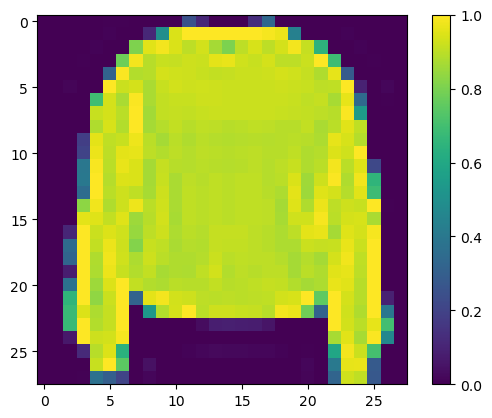

Pullover


In [19]:
index = 7
plt.figure()
plt.imshow(train_images [ index ])
plt.colorbar()
plt.grid(False)
plt.show()

print(class_names[train_labels[index]])

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

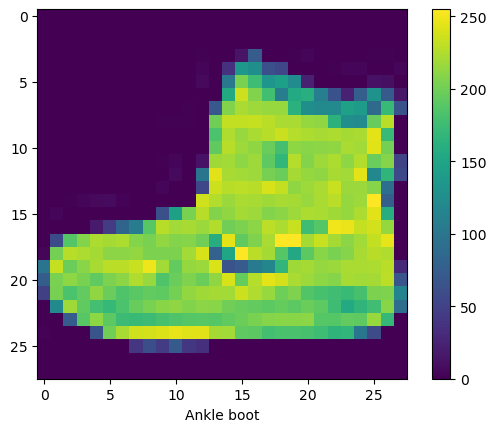

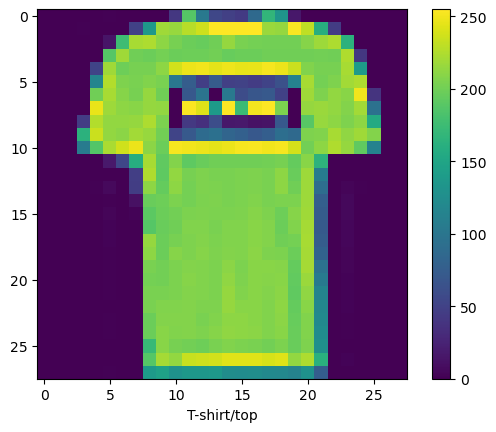

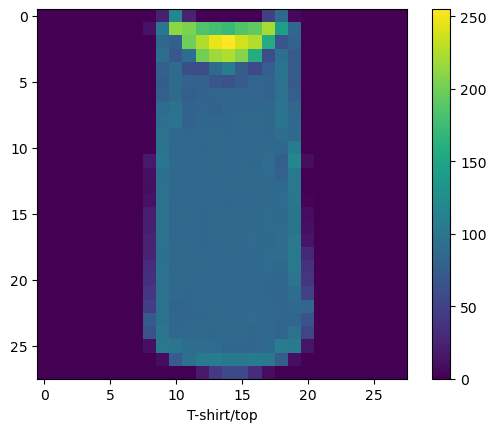

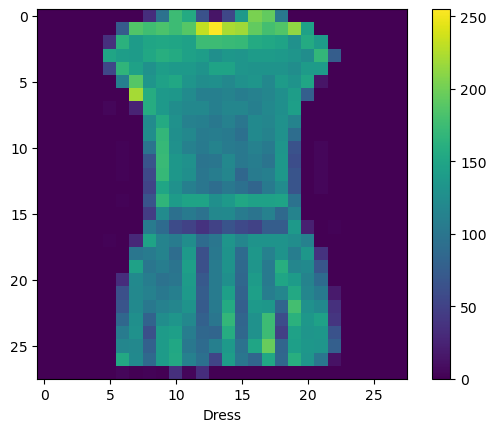

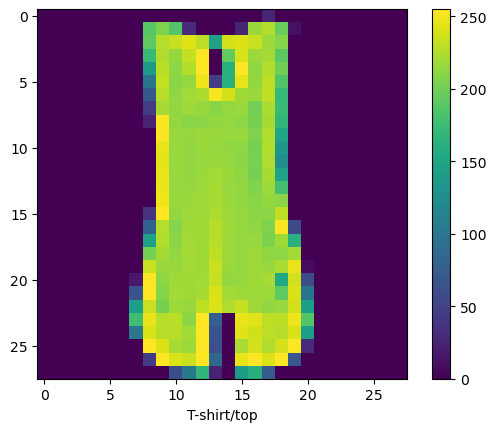

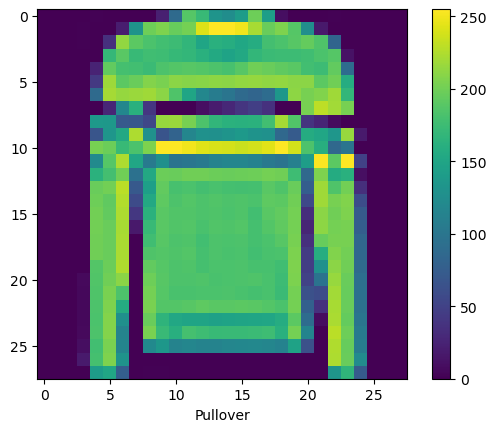

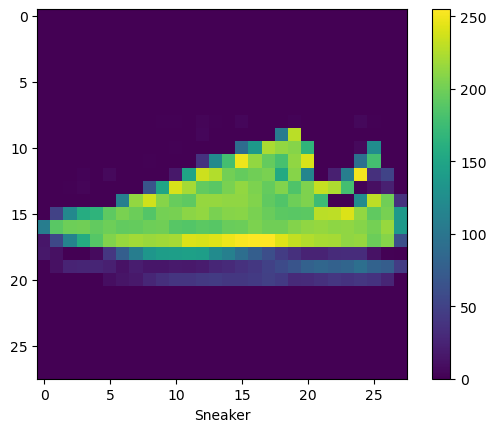

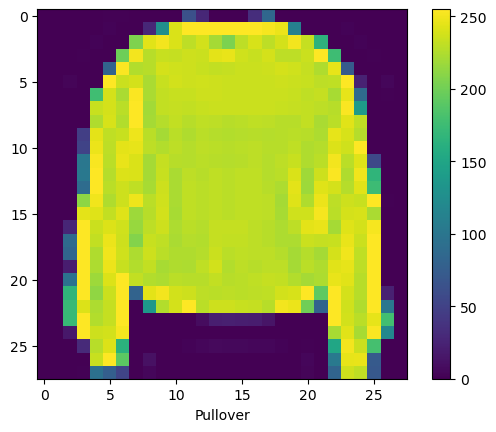

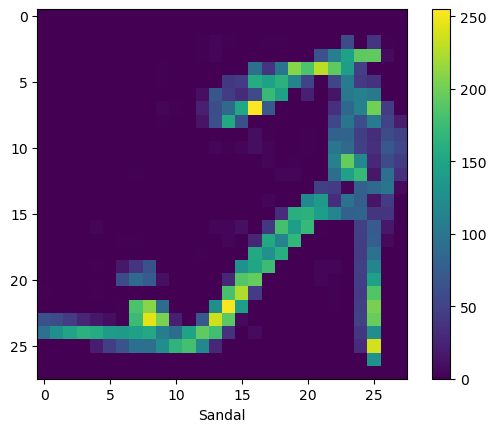

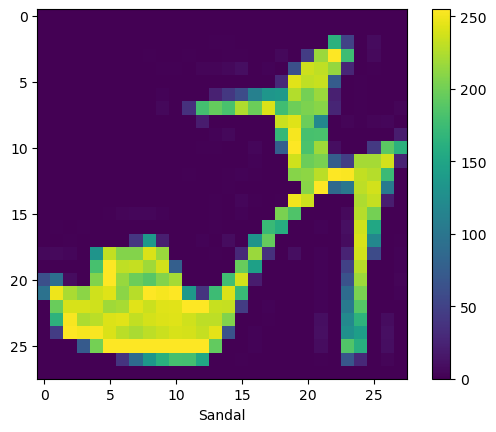

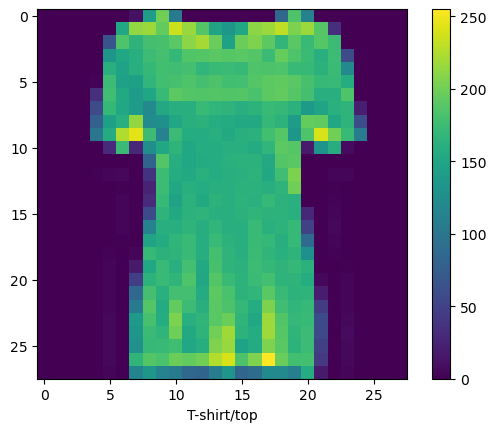

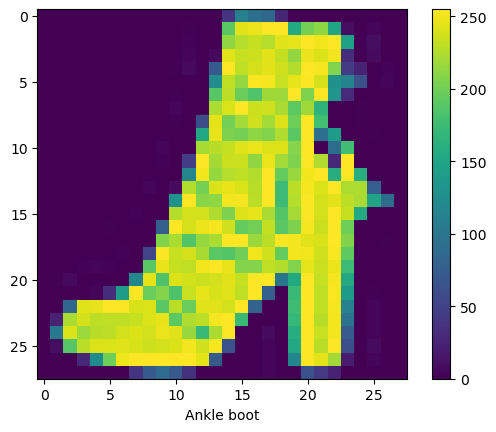

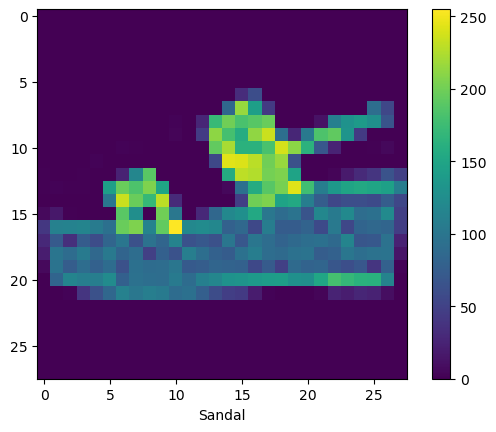

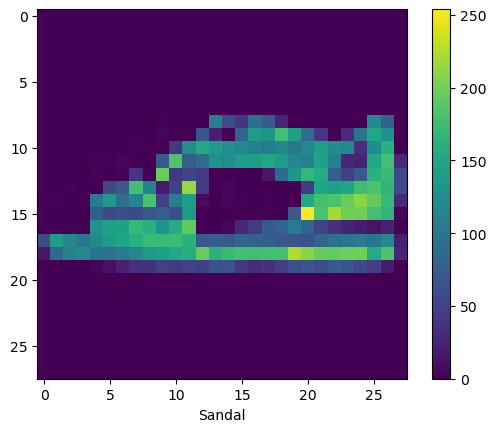

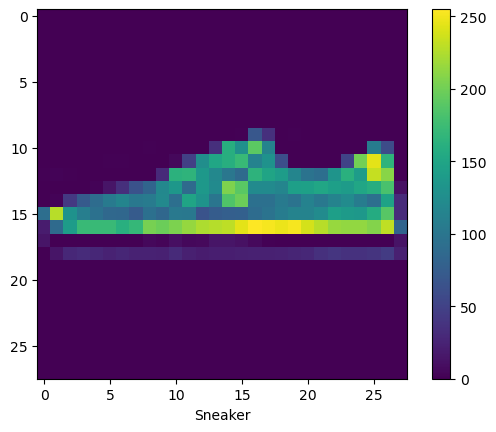

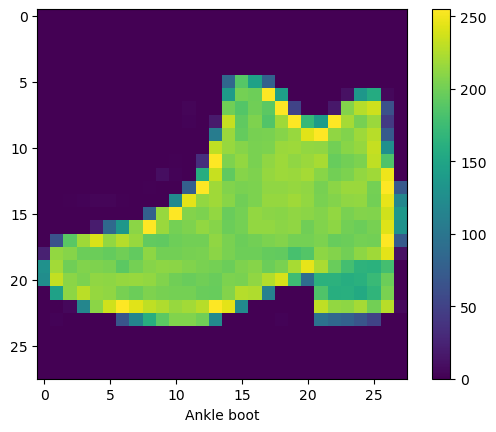

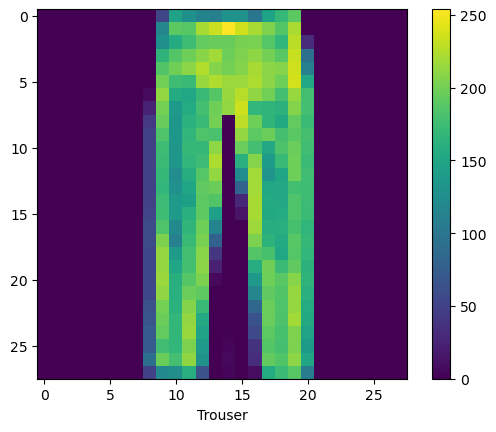

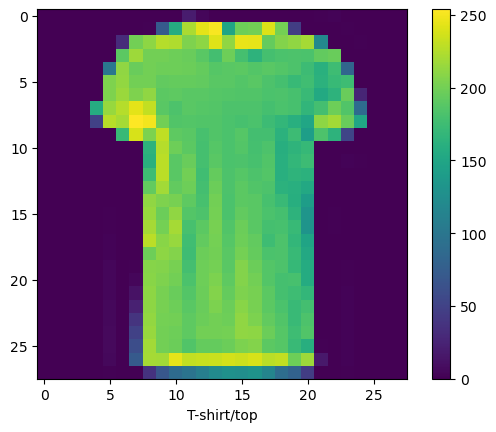

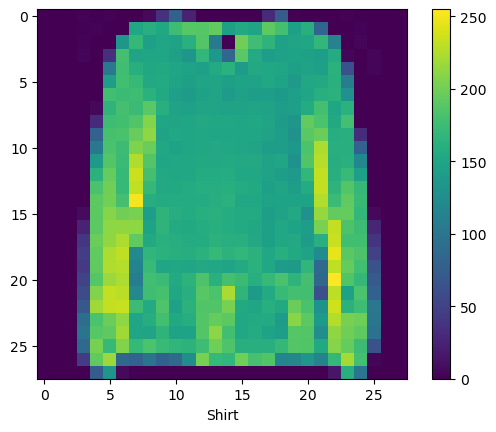

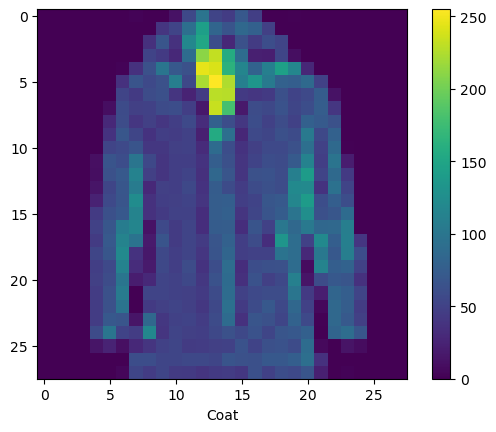

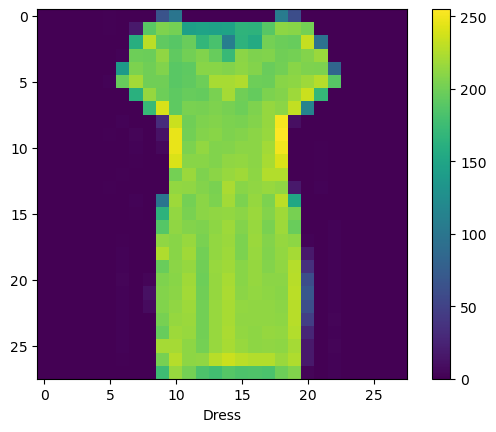

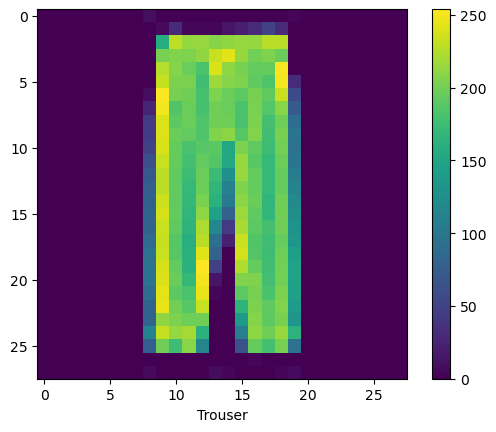

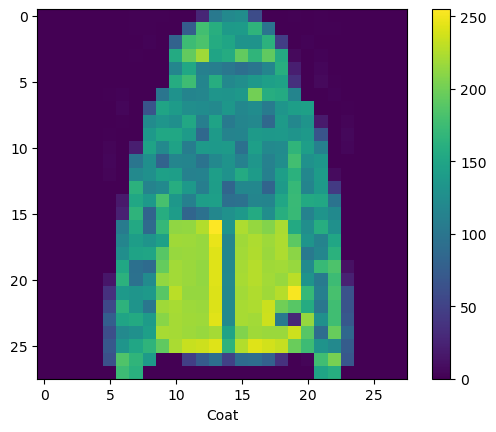

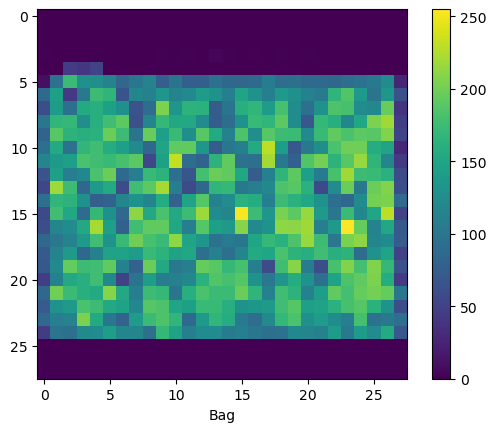

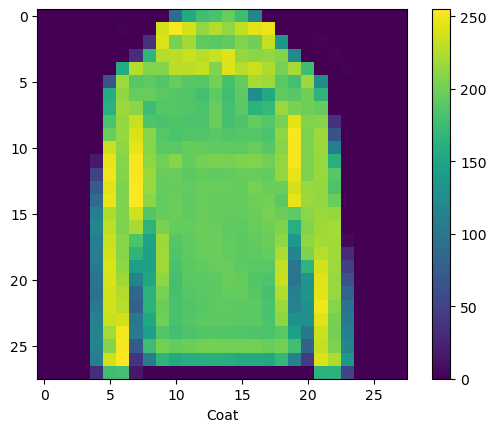

In [6]:
for index in range(0,25):
    plt.figure()
    plt.imshow(train_images [ index ])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel((class_names[int(train_labels[index])]))
    plt.show()

In [7]:
train_images = train_images / 255.0


In [8]:
model = keras . Sequential ([ 
    keras.layers.Flatten ( input_shape =(28 , 28) ) , 
    keras.layers.Dense (254 , activation ='relu') ,
    keras.layers.Dense (10 , activation ='softmax') ])

In [9]:
model.compile(  optimizer ='adam',
                loss ='sparse_categorical_crossentropy',
                metrics =[ 'accuracy'])

In [10]:
dic = []
for i in range(0,10) : 
    model.fit(train_images , train_labels , epochs = i)
    test_loss , test_acc = model.evaluate(test_images,test_labels ,verbose =2)
    dic.append(test_acc)


313/313 - 5s - loss: 179.4950 - accuracy: 0.1388 - 5s/epoch - 16ms/step
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4845 - accuracy: 0.8289
313/313 - 1s - loss: 60.0250 - accuracy: 0.8449 - 540ms/epoch - 2ms/step
Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3629 - accuracy: 0.8687
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3246 - accuracy: 0.8803
313/313 - 1s - loss: 72.7157 - accuracy: 0.8276 - 574ms/epoch - 2ms/step
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3033 - accuracy: 0.8888
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2877 - accuracy: 0.8934
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2721 - accuracy: 0.8978
313/313 - 1s - loss: 59.8270 - accuracy: 0.8590 - 572ms/epoch - 2ms/step
Epoch 1/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2613 - accuracy: 0.9024
Epoch 2/4
18

Text(0.5, 1.0, 'eval')

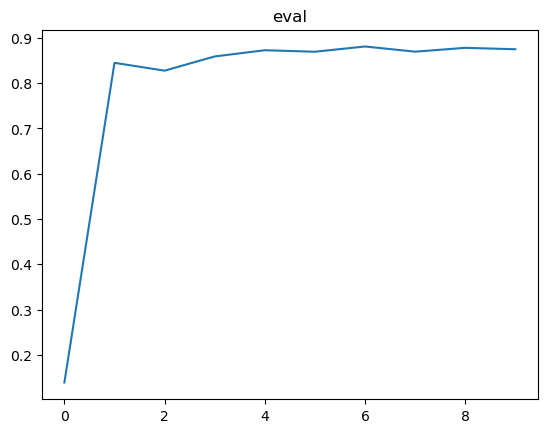

In [11]:
dic

fig, ax = plt.subplots()
ax.plot([0,1,2,3,4,5,6,7,8,9] , dic)
ax.set_title('eval')

In [12]:
test_loss , test_acc = model . evaluate ( test_images , test_labels ,verbose =2)


313/313 - 1s - loss: 119.5362 - accuracy: 0.8749 - 843ms/epoch - 3ms/step


In [13]:
predictions = model.predict (test_images)


313/313 [==============================] - 1s 2ms/step


1/1 [==============================] - 0s 34ms/step
9


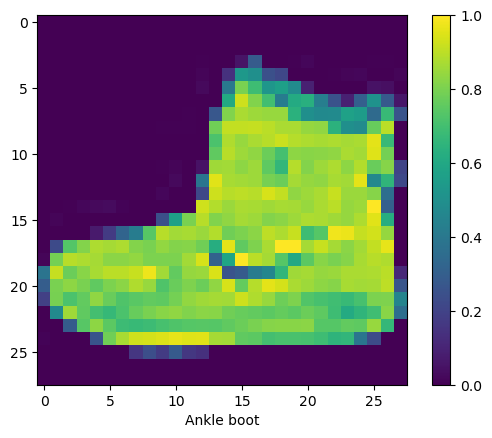

1/1 [==============================] - 0s 16ms/step
2


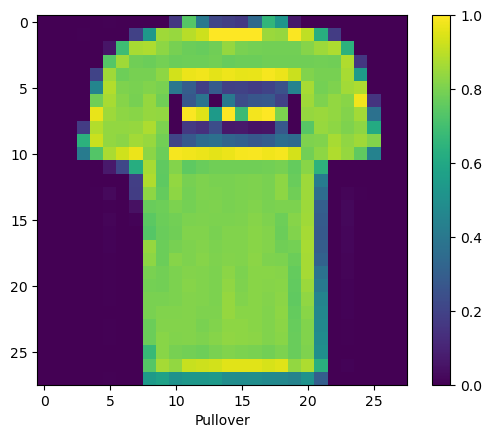

1/1 [==============================] - 0s 15ms/step
1


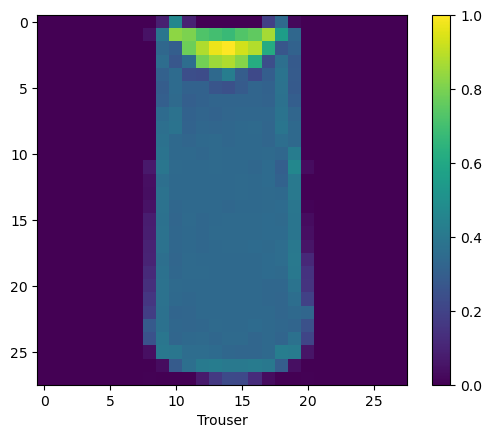

1/1 [==============================] - 0s 15ms/step
1


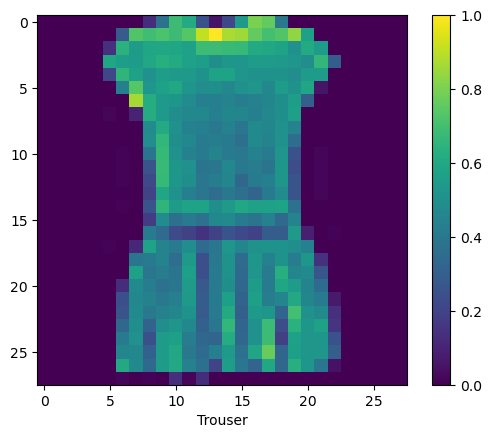

1/1 [==============================] - 0s 15ms/step
0


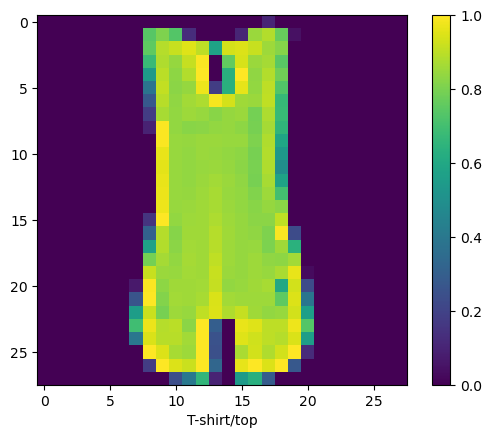

1/1 [==============================] - 0s 16ms/step
1


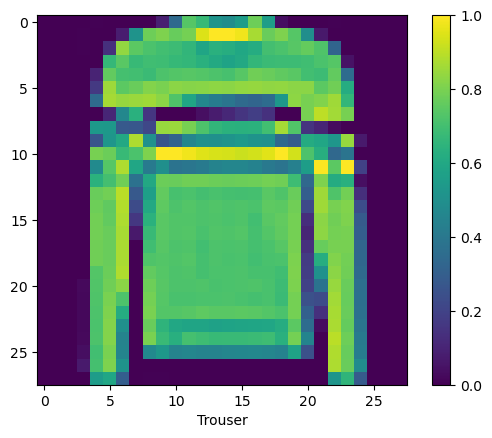

1/1 [==============================] - 0s 15ms/step
4


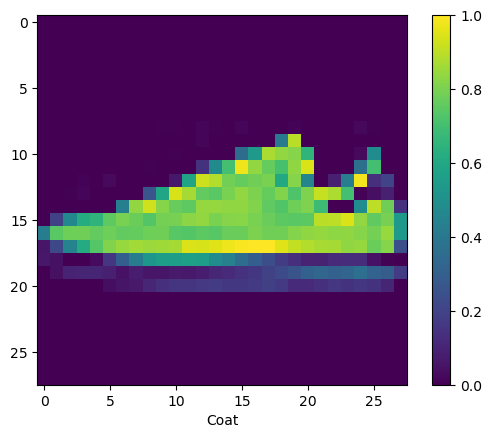

1/1 [==============================] - 0s 14ms/step
6


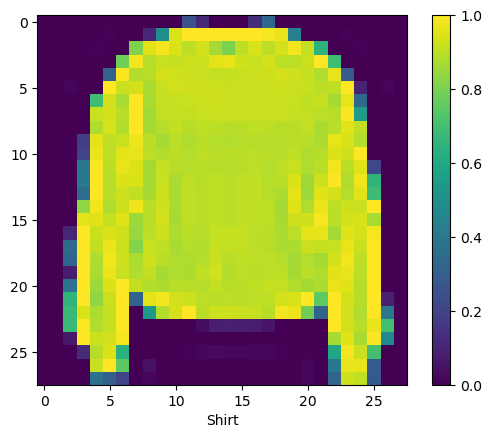

1/1 [==============================] - 0s 16ms/step
5


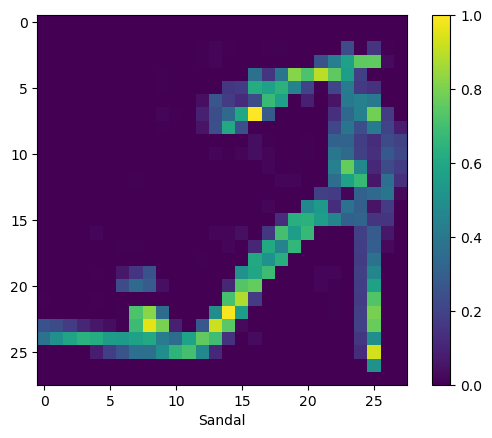

1/1 [==============================] - 0s 13ms/step
7


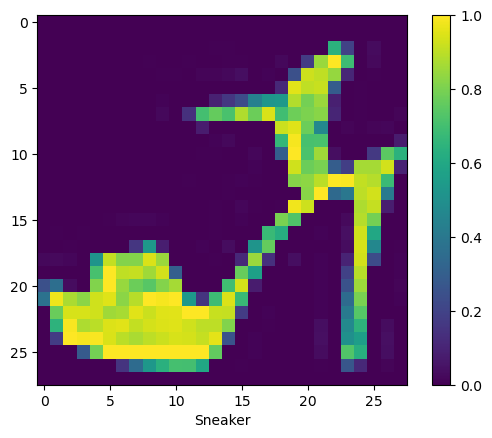

1/1 [==============================] - 0s 15ms/step
4


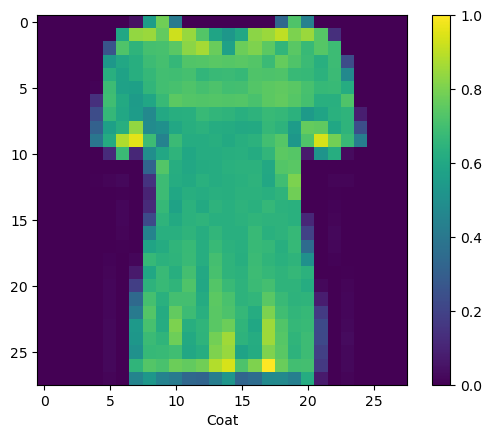

1/1 [==============================] - 0s 17ms/step
5


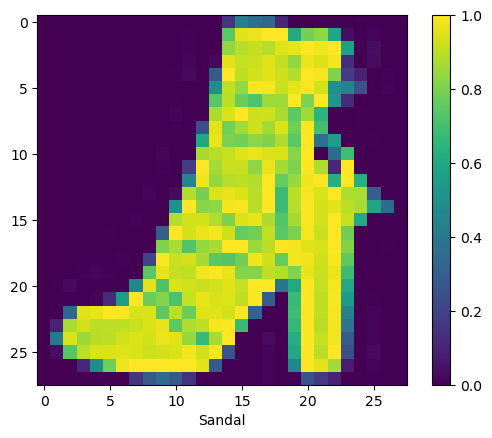

1/1 [==============================] - 0s 17ms/step
8


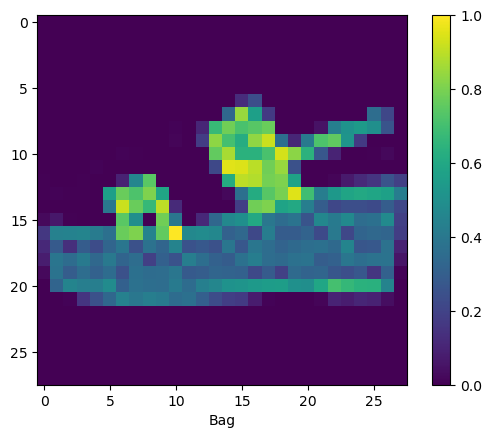

1/1 [==============================] - 0s 14ms/step
3


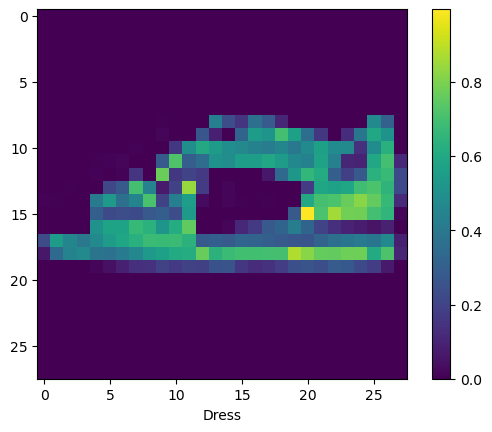

1/1 [==============================] - 0s 15ms/step
4


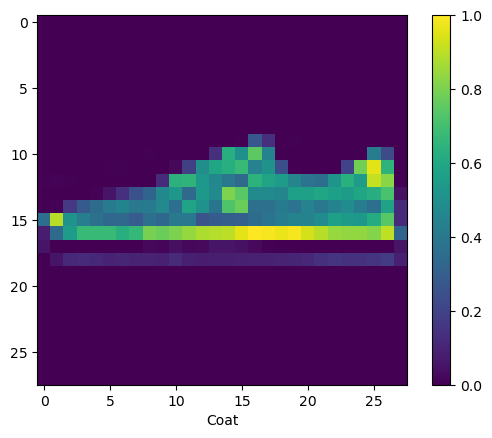

1/1 [==============================] - 0s 16ms/step
1


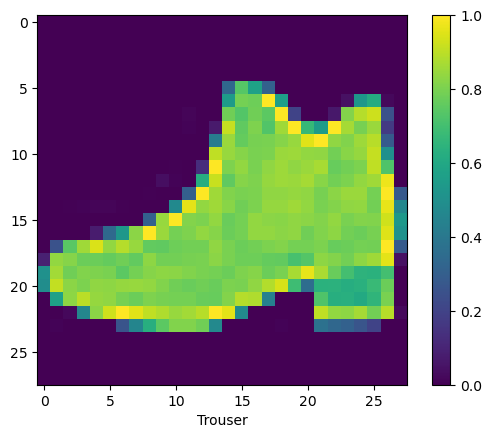

1/1 [==============================] - 0s 14ms/step
2


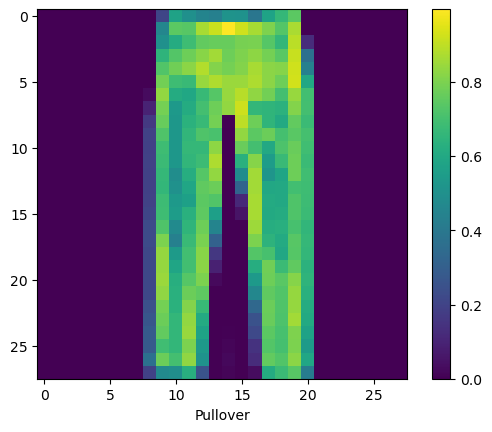

1/1 [==============================] - 0s 16ms/step
4


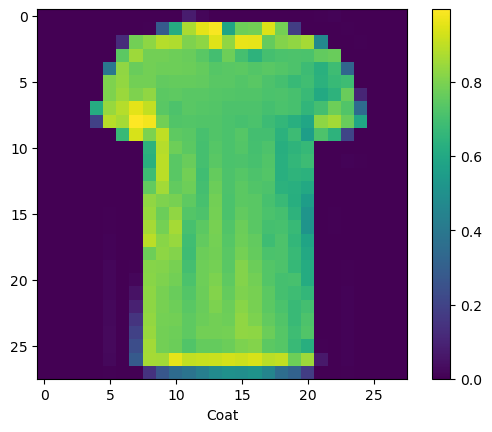

1/1 [==============================] - 0s 15ms/step
8


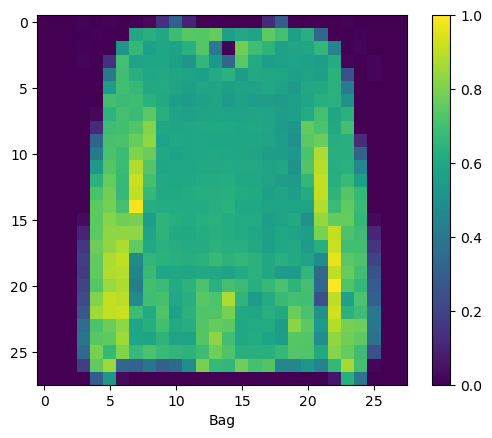

1/1 [==============================] - 0s 17ms/step
0


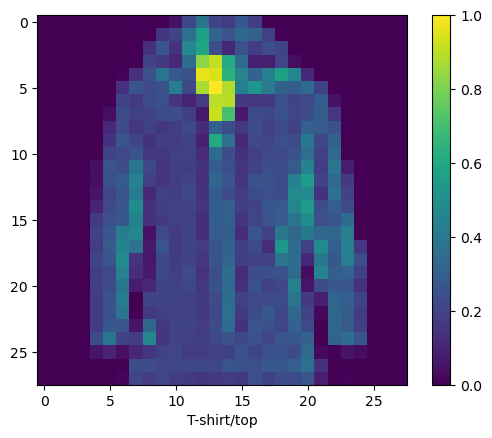

1/1 [==============================] - 0s 15ms/step
2


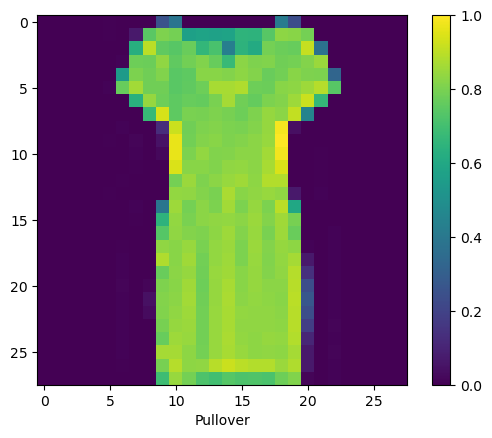

1/1 [==============================] - 0s 15ms/step
5


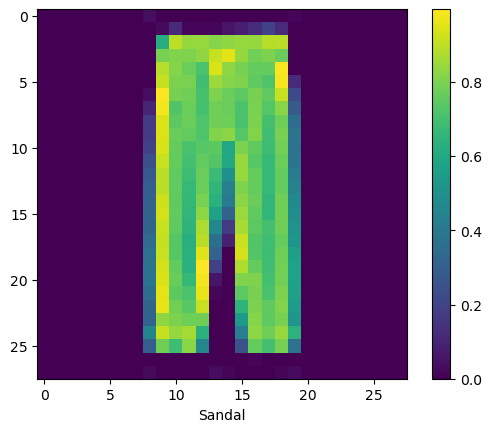

1/1 [==============================] - 0s 14ms/step
7


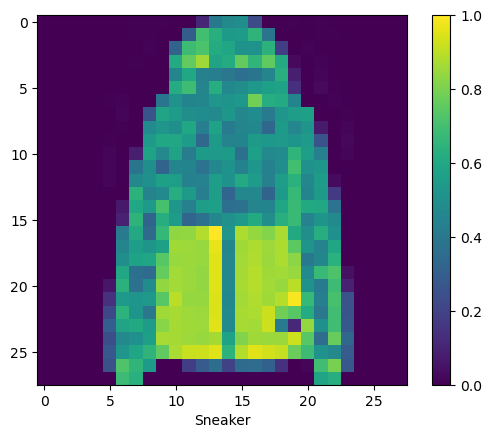

1/1 [==============================] - 0s 14ms/step
5


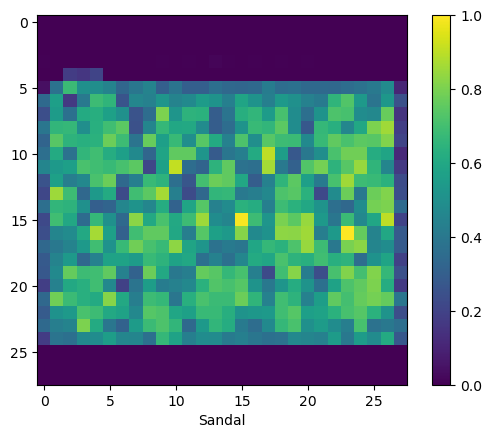

1/1 [==============================] - 0s 14ms/step
1


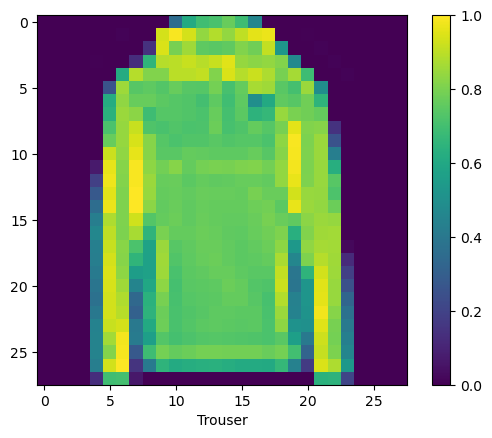

In [14]:
for index in range(0,25):
    predictions = model.predict (test_images[index])
    print(np.argmax(predictions))
    plt.figure()
    plt.imshow(train_images [ index ])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel((class_names[int(np.argmax(predictions))]))
    plt.show()

In [21]:
for index in range(0,2):
    predictions = model.predict (test_images[index])
    #print(predictions)
    #print(np.argmax(predictions))
    #print(np.max(predictions))
    #print(class_names[int(np.argmax(predictions))] +' '+str(np.max(predictions)) + ' ('+class_names[int(test_labels[index])] + ')'  )
    #print(class_names[int(test_labels[index])])


    plt.figure()
    plt.imshow(train_images [index])
    plt.colorbar()
    plt.grid(False)
    if (class_names[int(np.argmax(predictions))] == class_names[int(test_labels[index])] ):
        plt.xlabel(
            class_names[int(np.argmax(predictions))] + 
            ' ' +
            str( "{0:.0%}".format(np.max(predictions))) + 
            ' (' +
            class_names[int(test_labels[index])] + 
            ')', 
            color = 'b')
    else: 
        plt.xlabel(
            class_names[int(np.argmax(predictions))] + 
            ' ' + 
            str( "{0:.0%}".format(np.max(predictions))) +  
            ' (' + 
            class_names[int(test_labels[index])] + 
            ')' , 
            color = 'r') 
        plt.show()

AttributeError: 'KerasClassifier' object has no attribute 'model'

In [16]:
model.predict(test_images[5])

1/1 [==============================] - 0s 14ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from keras.layers.reshaping.flatten import Flatten
# MLP for Pima Indians Dataset with grid search via sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    #model = Sequential()
    #model.add(Dense(64, input_dim=8, kernel_initializer=init, activation='relu'))
    #model.add(Dense(32, kernel_initializer=init, activation='relu'))
    #model.add(Dense(10, kernel_initializer=init, activation='softmax'))


    model = Sequential()
    model.add(Flatten(input_shape = (28 , 28)))
    model.add(Dense(64, kernel_initializer=init, activation='relu'))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(16, kernel_initializer=init, activation='relu'))
    model.add(Dense(10, kernel_initializer=init, activation='softmax'))


    #model = keras . Sequential ([ 
    #keras.layers.Flatten ( input_shape =(28 , 28) ) , 
    #keras.layers.Dense (12 , activation ='relu') ,
    #keras.layers.Dense (8 , activation ='softmax') ])

    # Compile model
    #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables

X = train_images[0:50]
Y = train_labels[0:50]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
#epochs = [1, 2, 3]
batches = [5, 10, 20]
#batches = [1, 2, 3]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\jb\AppData\Local\Temp\ipykernel_7440\3901964186.py:46: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


KeyboardInterrupt: 